In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as  sns 
import os
sns.set_theme(style="whitegrid")
%matplotlib inline
df = pd.read_csv('../data/train_cleaned.csv')
df['log_price'] = np.log1p(df['price'])
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns.")



Dataset loaded with 16209 rows and 22 columns.


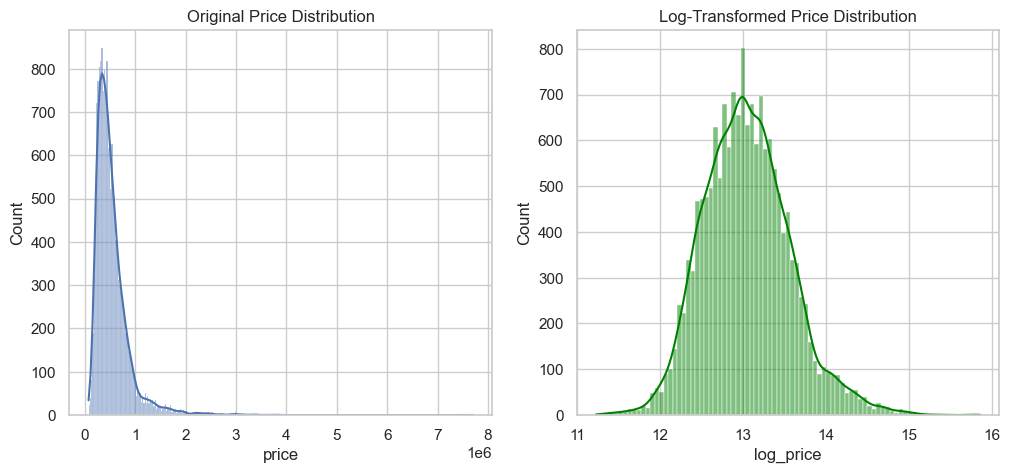

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['price'],kde =True)
plt.title('Original Price Distribution')
plt.subplot(1,2,2)
sns.histplot(df['log_price'],kde=True,color='green')
plt.title('Log-Transformed Price Distribution')
plt.show()

/var/folders/9k/qns6k_k103scmfmzz6zm_8m40000gn/T/ipykernel_15729/2706536885.py:36: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from font(s) Arial.
  plt.savefig('../docs/assets/Geographic_High_Contrast.png', dpi=300, bbox_inches='tight')
/Users/tanishakumari/Documents/RealEstate-Multimodal-Valuation/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


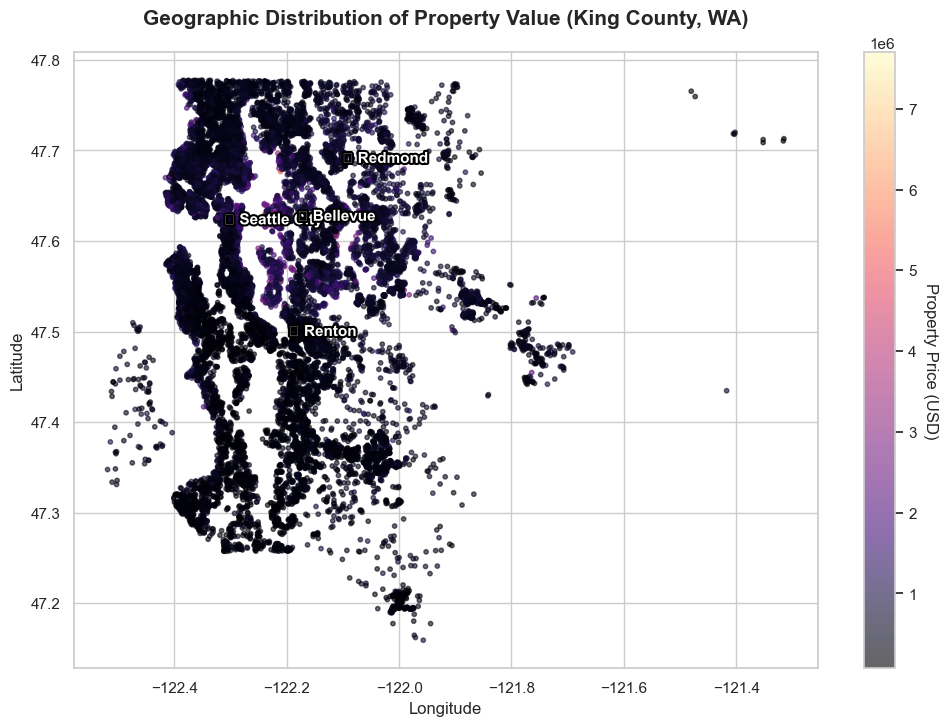

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

scatter = plt.scatter(df['long'], df['lat'], 
                      c=df['price'], cmap='magma', 
                      alpha=0.6, s=10)

cbar = plt.colorbar(scatter)
cbar.set_label('Property Price (USD)', rotation=270, labelpad=15)

landmarks = {
    '★ Seattle City': (-122.3321, 47.6062),
    '★ Bellevue': (-122.2015, 47.6101),
    '★ Redmond': (-122.1215, 47.6740),
    '★ Renton': (-122.2171, 47.4829)
}

for name, coords in landmarks.items():
    text = plt.annotate(name, xy=coords, xytext=(8, 8), 
                        textcoords='offset points', 
                        fontsize=11, fontweight='bold', color='white')
    
    text.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground='black'),
        path_effects.Normal()
    ])

plt.title("Geographic Distribution of Property Value (King County, WA)", fontsize=15, pad=20, fontweight='bold')
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

plt.savefig('../docs/assets/Geographic_High_Contrast.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
import joblib
features = ['bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 
            'waterfront', 'view', 'condition', 'grade', 'sqft_above', 
            'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])
os.makedirs('../models', exist_ok=True)
joblib.dump(scaler, '../models/feature_scaler.pkl')
print("Step 4 Complete: Numerical features standardized and scaler saved.")
df_scaled[features].head()

Step 4 Complete: Numerical features standardized and scaler saved.


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,0.677402,0.178963,-0.290276,-0.144952,0.922943,-0.083788,-0.306964,-0.626000,-0.557611,0.030720,-0.657843,-0.345663,-0.207964,-0.473911,-0.129791
1,-0.394132,0.505667,-0.521813,-0.311135,0.922943,-0.083788,-0.306964,0.908842,-0.557611,-0.224818,-0.657843,0.709771,-0.207964,-0.385919,-0.339019
2,0.677402,0.505667,-0.389506,-0.160457,0.922943,-0.083788,-0.306964,-0.626000,0.296350,-0.078796,-0.657843,0.777864,-0.207964,-0.165941,-0.196068
3,-1.465666,0.178963,-0.918734,-0.364787,0.922943,-0.083788,-0.306964,-0.626000,-0.557611,-0.772399,-0.452638,1.288558,-0.207964,-1.089851,-0.445025
4,-0.394132,-0.147741,-0.874632,-0.038936,-0.918626,-0.083788,-0.306964,-0.626000,-0.557611,-0.614209,-0.657843,0.777864,-0.207964,-0.576568,-0.173196


In [22]:
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(df_scaled, test_size=0.2, random_state=42)
train_data.to_csv('../data/train_final.csv', index=False)
val_data.to_csv('../data/val_final.csv', index=False)

print(f"✓ Step 5 Complete: Prepared {len(train_data)} training and {len(val_data)} validation samples.")

✓ Step 5 Complete: Prepared 12967 training and 3242 validation samples.
